# 掌握大气环流分型的基本方法--EOF
# 实习内容
### 对1979-2016 JJA亚澳季风区（20°S-40°N；30°E-180°E） 850hPa 位势高度进行自然正交展开，输出EOF第一模态和第二模态的空间场和时间序列。

In [1]:
# 需要用到的包
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
## EOF 关键包
from eofs.standard import Eof

In [2]:
# 读取数据
ds=xr.open_dataset('hgt.mon.mean.nc')
ds

C:\Users\林子扬\AppData\Roaming\Python\Python39\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
No module named 'findlibs'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:    (level: 17, lat: 73, lon: 144, time: 513, nbnds: 2)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    hgt        (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [3]:
hgt=ds['hgt'].loc[ds.time.dt.month.isin([6,7,8])].loc['1979-01-01':'2016-12-01',850.0,40:-20,30:180]
hgt=hgt.groupby(hgt.time.dt.year).mean(dim='time')
hgt

<xarray.DataArray 'hgt' (year: 38, lat: 25, lon: 61)>
array([[[1503.3334, 1497.    , 1489.3334, ..., 1540.6666, 1548.    ,
         1554.    ],
        [1498.    , 1491.6666, 1485.    , ..., 1556.3334, 1562.6666,
         1567.    ],
        [1499.3334, 1492.6666, 1487.6666, ..., 1566.    , 1570.    ,
         1574.    ],
        ...,
        [1557.3334, 1562.3334, 1565.    , ..., 1520.    , 1520.3334,
         1521.    ],
        [1564.6666, 1568.    , 1569.3334, ..., 1521.3334, 1521.6666,
         1522.6666],
        [1572.    , 1573.6666, 1573.3334, ..., 1520.    , 1520.3334,
         1521.3334]],

       [[1495.3334, 1491.    , 1485.6666, ..., 1517.    , 1524.3334,
         1532.    ],
        [1492.3334, 1487.    , 1481.    , ..., 1534.3334, 1540.6666,
         1548.3334],
        [1494.3334, 1489.3334, 1484.    , ..., 1548.3334, 1553.3334,
         1559.3334],
...
        [1553.6666, 1559.    , 1562.6666, ..., 1521.6666, 1521.3334,
         1521.6666],
        [1559.6666, 1564.3334, 1566.6666, ..., 1525.3334, 1525.6666,
         1526.3334],
        [1566.    , 1569.    , 1569.6666, ..., 1528.    , 1528.    ,
         1528.    ]],

       [[1507.6666, 1502.3334, 1496.6666, ..., 1541.3334, 1545.6666,
         1551.3334],
        [1498.6666, 1494.6666, 1489.6666, ..., 1553.    , 1558.6666,
         1564.6666],
        [1497.3334, 1494.    , 1490.3334, ..., 1560.6666, 1566.3334,
         1572.3334],
        ...,
        [1561.    , 1565.3334, 1568.6666, ..., 1520.3334, 1521.6666,
         1522.6666],
        [1568.6666, 1572.    , 1573.6666, ..., 1523.6666, 1525.    ,
         1526.    ],
        [1576.6666, 1578.3334, 1577.6666, ..., 1525.3334, 1526.3334,
         1527.    ]]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 ... -12.5 -15.0 -17.5 -20.0
  * lon      (lon) float32 30.0 32.5 35.0 37.5 40.0 ... 172.5 175.0 177.5 180.0
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015 2016

In [4]:
hgteof=Eof(np.array(hgt))
## 取前2两个模态
eofhgt=hgteof.eofsAsCorrelation(neofs=2) # 空间场
pchgt=hgteof.pcs(npcs=2,pcscaling=1) # 时间序列
evar=hgteof.varianceFraction(neigs=2) # 解释方差

In [5]:
pchgt

array([[-1.5634757 ,  0.07376511],
       [-1.224854  , -0.07571068],
       [ 0.7784287 , -0.18800074],
       [-0.42930058, -1.0165492 ],
       [-1.3497611 , -0.01416038],
       [ 1.785056  , -0.57181966],
       [ 0.5887041 , -0.8094481 ],
       [ 0.9104065 , -1.3801852 ],
       [-1.7197292 , -0.70097965],
       [-0.10521292,  1.2104366 ],
       [-0.18192312,  0.42833355],
       [ 0.37716174, -0.6417549 ],
       [ 0.3290026 , -1.0503819 ],
       [-0.4908305 , -0.01432126],
       [-1.1169811 , -0.99497277],
       [ 1.1831589 ,  0.13270588],
       [ 0.14463572,  0.4185814 ],
       [-0.11419309,  0.62284434],
       [-1.0135423 , -1.5045646 ],
       [-1.5861311 ,  2.2196324 ],
       [ 0.15570408,  0.71214926],
       [ 1.1451224 ,  0.7045367 ],
       [ 1.3586309 , -0.46098226],
       [-0.05403249, -1.2099621 ],
       [-0.27808395,  1.0985438 ],
       [-0.16156636, -1.0159552 ],
       [-0.06140544, -0.0340497 ],
       [-0.22836266,  0.06624586],
       [ 1.4682307 ,

In [6]:
lon=hgt["lon"].data
lat =hgt['lat'].data
time=hgt['year'].data

In [7]:
# 创建地图
def createmap(ax1):
    # 海岸线
    ax1.coastlines('110m')
    ax1.set_extent([30,180,-20,40],crs=ccrs.PlateCarree())
    # 标注坐标轴
    ax1.set_xticks(np.arange(30, 181, 30), crs=ccrs.PlateCarree())
    ax1.set_yticks(np.arange(-20, 41, 20), crs=ccrs.PlateCarree())
    # 设置大小刻度
    minorticks = MultipleLocator(10)
    majorticks = MultipleLocator(30)
    ax1.xaxis.set_major_locator(majorticks)
    ax1.xaxis.set_minor_locator(minorticks)
    ax1.yaxis.set_minor_locator(minorticks)
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

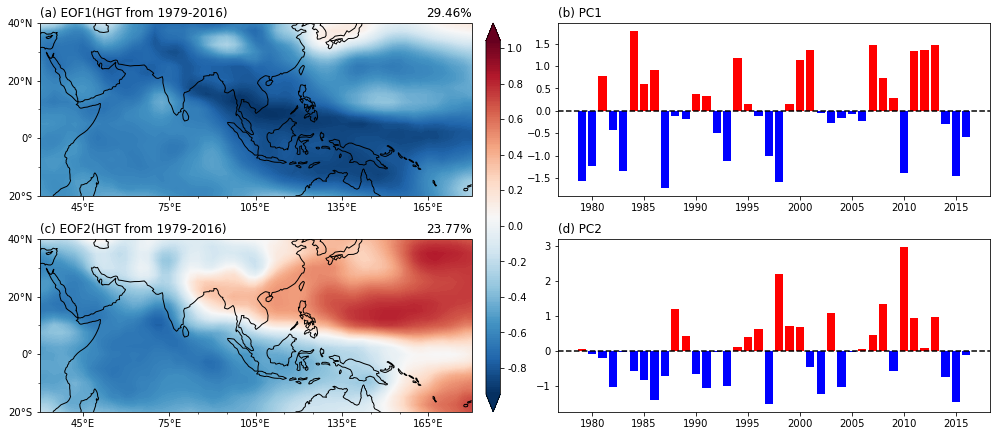

In [20]:
## 绘图部分
fig =plt.figure(figsize=(20,6))
# EOF空间场
ax1=fig.add_axes([0.1,0.55,0.48,0.4],projection=ccrs.PlateCarree(central_longitude=105))
ax3=fig.add_axes([0.1,0.05,0.48,0.4],projection=ccrs.PlateCarree(central_longitude=105))
createmap(ax1)
createmap(ax3)
# 设置标题
ax1.set_title('(a) EOF1(HGT from 1979-2016)',loc='left')
ax1.set_title(str(round(evar[0]*100,2))+'%',loc='right')
ax3.set_title('(c) EOF2(HGT from 1979-2016)',loc='left')
ax3.set_title(str(round(evar[1]*100,2))+'%',loc='right')
# EOF1
ax1.contourf(lon,lat,eofhgt[0,:,:],cmap=plt.cm.RdBu_r,zorder=0,extend='both',levels=np.arange(-0.9,1,0.01),transform=ccrs.PlateCarree())
# EOF2
colorbar=ax3.contourf(lon,lat,eofhgt[1,:,:],cmap=plt.cm.RdBu_r,zorder=0,extend='both',levels=np.arange(-0.9,1,0.01),transform=ccrs.PlateCarree())
colorbarax=fig.add_axes([0.50,0.05,0.01,0.9])
plt.colorbar(colorbar,cax=colorbarax,format='%.1f',shrink=0.5)
#EOF时间序列
ax2=fig.add_axes([0.55,0.55,0.3,0.4])
ax4=fig.add_axes([0.55,0.05,0.3,0.4])
ax2.set_title('(b) PC1',loc='left')
ax4.set_title('(d) PC2',loc='left')
###
bar=ax2.bar(time,pchgt[:,0],color='black')
for i in bar:
    if i.get_height()>0:
        i.set_facecolor('red')
    else:
        i.set_facecolor('blue')
# ax2.fill_between(time,pchgt[:,0],where=pchgt[:,0]>0,facecolor='red')
# ax2.fill_between(time,pchgt[:,0],where=pchgt[:,0]<0,facecolor='blue')
ax2.axhline(y=0,linestyle='--',color='black')
#-----------------------------------------------------------------------------------#
bar=ax4.bar(time,pchgt[:,1],color='black')
for i in bar:
    if i.get_height()>0:
        i.set_facecolor('red')
    else:
        i.set_facecolor('blue')
# ax4.fill_between(time,pchgt[:,1],where=pchgt[:,1]>0,facecolor='red')
# ax4.fill_between(time,pchgt[:,1],where=pchgt[:,1]<0,facecolor='blue')
ax4.axhline(y=0,linestyle='--',color='black')
##保存图片
plt.savefig('data/ex2.png')

In [10]:
bar

<BarContainer object of 38 artists>

In [14]:
print(i)

Rectangle(xy=(2015.6, 0), width=0.8, height=-0.572888, angle=0)


In [13]:
print(dir(i))

['_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alias_map', '_alpha', '_animated', '_antialiased', '_axes', '_bind_draw_path_function', '_callbacks', '_capstyle', '_clipon', '_clippath', '_cm_set', '_convert_units', '_convert_xy_units', '_dashes', '_dashoffset', '_default_contains', '_edge_default', '_edgecolor', '_facecolor', '_fill', '_get_clipping_extent_bbox', '_gid', '_hatch', '_hatch_color', '_height', '_in_layout', '_joinstyle', '_label', '_linestyle', '_linewidth', '_mouseover', '_original_edgecolor', '_original_facecolor', '_path_effects', '_picker', '_process_radius', '_rasterized', '_remove_method', '_set_alpha_for_arr

In [18]:
i.get_height()

-0.5728875398635864